## UTS Machine Learning

Anggota Kelompok :
- Adika Ahmad Nazhir (2041720171)
- Akhmad Ramadhani (2041720002)
- Andi Mushawwir Rahmat (2041720235)
- Kevin Natanael Wijaya (2041720091)
- Komang Gede Narariya Suputra (2041720225)
- Muh Fauzi Ramadhan Nugraha (2041720022)

Kelas TI - 3B

## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

### Pre Processing Data

In [2]:
# Import Library yang akan digunakan
import numpy as np
import pandas as pd


In [3]:
# Import Data set yang akan digunakan
df = pd.read_csv('data/tweet_emotions.csv')

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [4]:
# Cek jumlah data yang dimiliki masing masing sentiment
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

<AxesSubplot:>

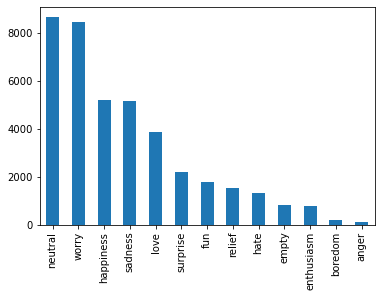

In [5]:
df['sentiment'].value_counts().plot(kind='bar')



##### Case Folding & Cleaning Data

In [6]:
# function to clean the tweets 
import re
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    #remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    text.lower()
    return text

In [7]:
# case folding
temp = df['content'].str.lower()

In [8]:
# remove hashtag and mention using regex
import re

temp = temp.apply(lambda x: re.sub(r'@\w+|#\w+', '', x))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998     wassup beautiful!!! follow me!!  peep out my ...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [9]:
# remove url using regex
temp = temp.apply(lambda x: re.sub(r'http\S+', '', x))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998     wassup beautiful!!! follow me!!  peep out my ...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [10]:
# remove punctuation
import string

temp = temp.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [11]:
# remove duplicate item
temp = temp.drop_duplicates()

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 39172, dtype: object

In [12]:
# remove number
temp = temp.apply(lambda x: re.sub(r'\d+', '', x))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 39172, dtype: object

In [13]:
# check null value
temp.isnull().sum()


0

In [14]:
# remove whitespace
temp = temp.apply(lambda x: x.strip())

temp


0        i know  i was listenin to bad habit earlier an...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4        we want to trade with someone who has houston ...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998    wassup beautiful follow me  peep out my new hi...
39999    bullet train from tokyo    the gf and i have b...
Name: content, Length: 39172, dtype: object

##### Stopwords Removal

In [15]:
import nltk
# download all 

nltk.download('all')




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/akhmadramadani/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/akhmadramadani/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/akhmadramadani/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/akhmadramadani/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/akhmadramadani/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-da

True

In [16]:

# remove stopword
from nltk.corpus import stopwords

stop = stopwords.words('english')

temp = temp.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                   want trade someone houston tickets one
                               ...                        
39994                          succesfully following tayla
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

##### Lemmatization

In [17]:
# lemmatization
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

temp = temp.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                    want hang friend soon
4                    want trade someone houston ticket one
                               ...                        
39994                          succesfully following tayla
39996                                happy mother day love
39997    happy mother day mommy woman man long youre mo...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

##### Tokenization

In [18]:
# tokenization
from nltk.tokenize import word_tokenize

temp = temp.apply(lambda x: word_tokenize(x))

temp

0        [know, listenin, bad, habit, earlier, started,...
1            [layin, n, bed, headache, ughhhhwaitin, call]
2                        [funeral, ceremonygloomy, friday]
3                               [want, hang, friend, soon]
4             [want, trade, someone, houston, ticket, one]
                               ...                        
39994                      [succesfully, following, tayla]
39996                           [happy, mother, day, love]
39997    [happy, mother, day, mommy, woman, man, long, ...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: content, Length: 39172, dtype: object

In [19]:
# temp to df content_token
df['content_token'] = temp

df


,tweet_id,sentiment,content,content_token
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket, one]"
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,NaN
39996,1753919001,love,Happy Mothers Day All my love,"[happy, mother, day, love]"
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"[happy, mother, day, mommy, woman, man, long, ..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[wassup, beautiful, follow, peep, new, hit, si..."


In [20]:
# remove NaN data in content_token
df = df.dropna(subset=['content_token'])

df

,tweet_id,sentiment,content,content_token
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket, one]"
...,...,...,...,...
39994,1753918900,happiness,Succesfully following Tayla!!,"[succesfully, following, tayla]"
39996,1753919001,love,Happy Mothers Day All my love,"[happy, mother, day, love]"
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"[happy, mother, day, mommy, woman, man, long, ..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[wassup, beautiful, follow, peep, new, hit, si..."


##### Finding & Removing Duplicate Synonim?

In [21]:
## Find synonym of each token.
from nltk.corpus import wordnet
def find_synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return synonyms

df['synonym'] = df['content_token'].apply(lambda x: [find_synonym(word) for word in x])



/var/folders/d7/7q80sn_n1_n7xv451d5yltvr0000gn/T/ipykernel_21808/4102735567.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['synonym'] = df['content_token'].apply(lambda x: [find_synonym(word) for word in x])


In [22]:
df

,tweet_id,sentiment,content,content_token,synonym
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,...","[[know, know, cognize, cognise, know, know, kn..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]","[[], [nitrogen, N, atomic_number_7, north, due..."
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]","[[funeral], [], [Friday, Fri]]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]","[[privation, want, deprivation, neediness, lac..."
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket, one]","[[privation, want, deprivation, neediness, lac..."
...,...,...,...,...,...
39994,1753918900,happiness,Succesfully following Tayla!!,"[succesfully, following, tayla]","[[], [following, followers, pursuit, chase, pu..."
39996,1753919001,love,Happy Mothers Day All my love,"[happy, mother, day, love]","[[happy, felicitous, happy, glad, happy, happy..."
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"[happy, mother, day, mommy, woman, man, long, ...","[[happy, felicitous, happy, glad, happy, happy..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[wassup, beautiful, follow, peep, new, hit, si...","[[], [beautiful, beautiful], [follow, postdate..."


In [23]:
## Dictionary of word index
index_word = {}
for i, word in enumerate(df['content_token'].sum()):
    if word not in index_word:
        index_word[i] = word
        

In [24]:
words = [value for key, value in index_word.items()]

words

['know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'started',
 'freakin',
 'part',
 'layin',
 'n',
 'bed',
 'headache',
 'ughhhhwaitin',
 'call',
 'funeral',
 'ceremonygloomy',
 'friday',
 'want',
 'hang',
 'friend',
 'soon',
 'want',
 'trade',
 'someone',
 'houston',
 'ticket',
 'one',
 'repinging',
 'didnt',
 'go',
 'prom',
 'bc',
 'bf',
 'didnt',
 'like',
 'friend',
 'sleep',
 'im',
 'thinking',
 'old',
 'friend',
 'want',
 'he',
 'married',
 'damn',
 'amp',
 'want',
 'scandalous',
 'hmmm',
 'charlene',
 'love',
 'miss',
 'im',
 'sorry',
 'least',
 'friday',
 'cant',
 'fall',
 'asleep',
 'choked',
 'retainer',
 'ugh',
 'beat',
 'stupid',
 'song',
 'get',
 'next',
 'rude',
 'u',
 'watch',
 'hill',
 'london',
 'u',
 'realise',
 'tourture',
 'week',
 'week',
 'late',
 'watch',
 'itonlinelol',
 'got',
 'news',
 'storm',
 'electricity',
 'gone',
 'agreed',
 'sleepy',
 'even',
 'late',
 'fail',
 'lady',
 'gaga',
 'tweeted',
 'impressed',
 'video',
 'leaking',
 'know',
 'convinced',
 'al

In [26]:
# set synonym dictionary using find_synonym function 
synonym_dict = {}
for word in words:
    synonym_dict.update({word : tuple([w.lower() for w in find_synonym(word)])})



In [27]:
synonym_dict

{'know': ('know',
  'know',
  'cognize',
  'cognise',
  'know',
  'know',
  'know',
  'know',
  'experience',
  'live',
  'acknowledge',
  'recognize',
  'recognise',
  'know',
  'know',
  'sleep_together',
  'roll_in_the_hay',
  'love',
  'make_out',
  'make_love',
  'sleep_with',
  'get_laid',
  'have_sex',
  'know',
  'do_it',
  'be_intimate',
  'have_intercourse',
  'have_it_away',
  'have_it_off',
  'screw',
  'fuck',
  'jazz',
  'eff',
  'hump',
  'lie_with',
  'bed',
  'have_a_go_at_it',
  'bang',
  'get_it_on',
  'bonk',
  'know',
  'know',
  'know'),
 'listenin': (),
 'bad': ('bad',
  'badness',
  'bad',
  'bad',
  'big',
  'bad',
  'tough',
  'bad',
  'spoiled',
  'spoilt',
  'regretful',
  'sorry',
  'bad',
  'bad',
  'uncollectible',
  'bad',
  'bad',
  'bad',
  'risky',
  'high-risk',
  'speculative',
  'bad',
  'unfit',
  'unsound',
  'bad',
  'bad',
  'bad',
  'forged',
  'bad',
  'defective',
  'badly',
  'bad',
  'badly',
  'bad'),
 'habit': ('habit',
  'wont',
  'habi

In [28]:
# remove duplicate synonym
for key, value in synonym_dict.items():
    synonym_dict[key] = tuple(set(value))

synonym_dict

{'know': ('recognise',
  'have_sex',
  'jazz',
  'have_a_go_at_it',
  'recognize',
  'bang',
  'make_out',
  'be_intimate',
  'get_laid',
  'have_it_off',
  'hump',
  'live',
  'sleep_with',
  'have_it_away',
  'roll_in_the_hay',
  'get_it_on',
  'eff',
  'cognise',
  'bed',
  'screw',
  'bonk',
  'know',
  'experience',
  'love',
  'do_it',
  'have_intercourse',
  'fuck',
  'acknowledge',
  'cognize',
  'sleep_together',
  'make_love',
  'lie_with'),
 'listenin': (),
 'bad': ('defective',
  'high-risk',
  'spoilt',
  'badness',
  'sorry',
  'risky',
  'bad',
  'uncollectible',
  'spoiled',
  'tough',
  'unsound',
  'unfit',
  'badly',
  'forged',
  'big',
  'speculative',
  'regretful'),
 'habit': ('riding_habit',
  'drug_abuse',
  'substance_abuse',
  'habit',
  'wont',
  'use'),
 'earlier': ('earliest',
  'early',
  'to_begin_with',
  'in_the_first_place',
  'before',
  'other',
  'in_the_beginning',
  'former',
  'earlier',
  'originally',
  'sooner'),
 'started': ('start_out',
  '

In [29]:
# remove null value in synonym_dict
synonym_dict = {k: v for k, v in synonym_dict.items() if v}

synonym_dict

{'know': ('recognise',
  'have_sex',
  'jazz',
  'have_a_go_at_it',
  'recognize',
  'bang',
  'make_out',
  'be_intimate',
  'get_laid',
  'have_it_off',
  'hump',
  'live',
  'sleep_with',
  'have_it_away',
  'roll_in_the_hay',
  'get_it_on',
  'eff',
  'cognise',
  'bed',
  'screw',
  'bonk',
  'know',
  'experience',
  'love',
  'do_it',
  'have_intercourse',
  'fuck',
  'acknowledge',
  'cognize',
  'sleep_together',
  'make_love',
  'lie_with'),
 'bad': ('defective',
  'high-risk',
  'spoilt',
  'badness',
  'sorry',
  'risky',
  'bad',
  'uncollectible',
  'spoiled',
  'tough',
  'unsound',
  'unfit',
  'badly',
  'forged',
  'big',
  'speculative',
  'regretful'),
 'habit': ('riding_habit',
  'drug_abuse',
  'substance_abuse',
  'habit',
  'wont',
  'use'),
 'earlier': ('earliest',
  'early',
  'to_begin_with',
  'in_the_first_place',
  'before',
  'other',
  'in_the_beginning',
  'former',
  'earlier',
  'originally',
  'sooner'),
 'started': ('start_out',
  'depart',
  'origi

In [30]:
import collections
value_occurrences = collections.Counter(synonym_dict.values())

filtered_synonym = {key: value for key, value in synonym_dict.items() if value_occurrences[value] == 1}

In [31]:
filtered_synonym

{'bad': ('defective',
  'high-risk',
  'spoilt',
  'badness',
  'sorry',
  'risky',
  'bad',
  'uncollectible',
  'spoiled',
  'tough',
  'unsound',
  'unfit',
  'badly',
  'forged',
  'big',
  'speculative',
  'regretful'),
 'habit': ('riding_habit',
  'drug_abuse',
  'substance_abuse',
  'habit',
  'wont',
  'use'),
 'earlier': ('earliest',
  'early',
  'to_begin_with',
  'in_the_first_place',
  'before',
  'other',
  'in_the_beginning',
  'former',
  'earlier',
  'originally',
  'sooner'),
 'started': ('start_out',
  'depart',
  'originate',
  'take_off',
  'start',
  'set_out',
  'initiate',
  'protrude',
  'come_out',
  'bug_out',
  'pop',
  'go',
  'take_up',
  'commence',
  'startle',
  'part',
  'lead_off',
  'jump',
  'bulge_out',
  'embark_on',
  'get_down',
  'get_going',
  'bulge',
  'begin',
  'start_up',
  'get',
  'set_about',
  'set_forth',
  'set_off',
  'pop_out'),
 'part': ('depart',
  'start_out',
  'partially',
  'take_off',
  'start',
  'division',
  'set_out',
  

In [32]:
## Function for augmenting data by replacing words with synonym using spaCy
import re
import random
sr = random.SystemRandom()
split_pattern = re.compile(r'\s+')
def data_augmentation(message, aug_range=1) :
    augmented_messages = []
    for j in range(0,aug_range) :
        new_message = ""
        for i in filter(None, split_pattern.split(message)) :
            new_message = new_message + " " + sr.choice(filtered_synonym.get(i,[i]))
        augmented_messages.append(new_message)
    return augmented_messages


In [33]:
tweet_count = df.sentiment.value_counts().to_dict()

In [34]:
## Get max intent count to match other minority classes through data augmentation
import operator
max_intent_count = max(tweet_count.items(), key=operator.itemgetter(1))[1]

##### Balancing Data

Dikarenakan data sentiment terpaut sangat jauh, seperti neutral berisikan 8638 data, sedangkan anger sebanyak 110 data. Kami memutuskan untuk balancing data agar membuat data lebih adil dalam hal pembelajaran akurasi nantinya. Kami melakukan metode Oversampling yang artinya melakukan penambahan data sintetis yang merujuk kepada jumlah data terbanyak dalam dataset.

In [35]:
import numpy as np
import math
import tqdm
newdf = pd.DataFrame()
for intent, count in tweet_count.items() :
    count_diff = max_intent_count - count    ## Difference to fill
    multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times
    if (multiplication_count) :
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(df[df["sentiment"] == intent]['content'].values) :
            ## Extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns=['content'])
            dummy1["sentiment"] = intent
            # concat existing minority class batch
            old_message_df = pd.concat([old_message_df, dummy1])

            ## Creating new augmented batch from existing minority class
            new_messages = data_augmentation(message,  multiplication_count)
            dummy2 = pd.DataFrame(new_messages, columns=['content'])
            dummy2["sentiment"] = intent
            # concat new augmented batch
            new_message_df = pd.concat([new_message_df, dummy2])

        ## Select random data points from augmented data
        new_message_df=new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        
        ## Merge existing and augmented data points using concat
        newdf = pd.concat([newdf, old_message_df, new_message_df])
        # newdf = newdf.append([old_message_df,new_message_df])
    else :
        newdf = pd.concat([newdf, df[df["sentiment"] == intent]])
        # newdf = newdf.append(df[df["Intent"] == intent])

100%|██████████| 110/110 [00:00<00:00, 550.85it/s]


In [36]:
newdf

,tweet_id,sentiment,content,content_token,synonym
4,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket, one]","[[privation, want, deprivation, neediness, lac..."
10,1.956969e+09,neutral,cant fall asleep,"[cant, fall, asleep]","[[buzzword, cant, bank, cant, camber, slang, c..."
22,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"[topic, map, talk, balisage, markup, conferenc...","[[subject, topic, theme, topic, subject, issue..."
31,1.956975e+09,neutral,@cynthia_123 i cant sleep,"[cant, sleep]","[[buzzword, cant, bank, cant, camber, slang, c..."
32,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"[missed, bly, bus]","[[miss, lose, miss, miss, neglect, pretermit, ..."
...,...,...,...,...,...
74,NaN,anger,Very defective things.......I motive to check...,NaN,NaN
40,NaN,anger,"@taylorswift13 Hello, yourself. Enjoy London....",NaN,NaN
59,NaN,anger,@rockchick0125 yup! Now I derriere juncture i...,NaN,NaN
8,NaN,anger,@anieszkaa haha iodin did a ltiitle turn yest...,NaN,NaN


In [37]:

newdf.value_counts('sentiment')

sentiment
anger         8356
boredom       8356
empty         8356
enthusiasm    8356
fun           8356
happiness     8356
hate          8356
love          8356
neutral       8356
relief        8356
sadness       8356
surprise      8356
worry         8356
dtype: int64

In [38]:
## Save newdf to csv file
newdf.to_csv('data/augmented_data.csv', index=False)


In [39]:
clean_df = pd.read_csv('data/augmented_data.csv')

clean_df.head()

,tweet_id,sentiment,content,content_token,synonym
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine..."
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'..."
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'..."
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '..."


In [40]:
clean_df.value_counts('sentiment')

sentiment
anger         8356
boredom       8356
empty         8356
enthusiasm    8356
fun           8356
happiness     8356
hate          8356
love          8356
neutral       8356
relief        8356
sadness       8356
surprise      8356
worry         8356
dtype: int64

<AxesSubplot:>

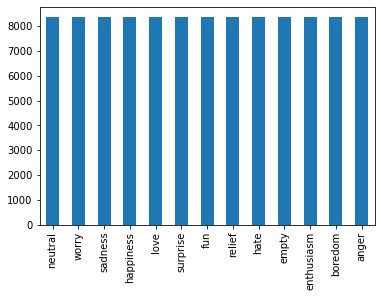

In [41]:
clean_df['sentiment'].value_counts().plot(kind='bar')

In [42]:
# cleaning the tweets using clean_tweet function

clean_df['clean_tweet'] = clean_df['content'].apply(lambda x: cleanTxt(x))


In [43]:
clean_df

,tweet_id,sentiment,content,content_token,synonym,clean_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",We want to trade with someone who has Houston...
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",No Topic Maps talks at the Balisage Markup Con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",i cant sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",I missed the bl y bus
...,...,...,...,...,...,...
108623,NaN,anger,Very defective things.......I motive to check...,NaN,NaN,Very defective things I motive to check...
108624,NaN,anger,"@taylorswift13 Hello, yourself. Enjoy London....",NaN,NaN,Hello yourself Enjoy London Watch away ...
108625,NaN,anger,@rockchick0125 yup! Now I derriere juncture i...,NaN,NaN,yup Now I derriere juncture inward on th...
108626,NaN,anger,@anieszkaa haha iodin did a ltiitle turn yest...,NaN,NaN,haha iodin did a ltiitle turn yesterday and ...


In [44]:
# lower casing clean_tweet column

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: x.lower())

clean_df

,tweet_id,sentiment,content,content_token,synonym,clean_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",we want to trade with someone who has houston...
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",no topic maps talks at the balisage markup con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",i cant sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",i missed the bl y bus
...,...,...,...,...,...,...
108623,NaN,anger,Very defective things.......I motive to check...,NaN,NaN,very defective things i motive to check...
108624,NaN,anger,"@taylorswift13 Hello, yourself. Enjoy London....",NaN,NaN,hello yourself enjoy london watch away ...
108625,NaN,anger,@rockchick0125 yup! Now I derriere juncture i...,NaN,NaN,yup now i derriere juncture inward on th...
108626,NaN,anger,@anieszkaa haha iodin did a ltiitle turn yest...,NaN,NaN,haha iodin did a ltiitle turn yesterday and ...


In [45]:
# function to remove stop words from clean_tweet column

def remove_stopwords(text):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)


In [46]:
# stopword removal

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: remove_stopwords(x))

In [47]:
# function to lemmitize clean_tweet column

def lemmatization(text):
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)
    

In [48]:
# lemmitization

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: lemmatization(x))

In [49]:
# tokenization using word_tokenize

clean_df['clean_tweet_token'] = clean_df['clean_tweet'].apply(lambda x: word_tokenize(x))

clean_df

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket one,"[want, trade, someone, houston, ticket, one]"
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"[cant, fall, asleep]"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"[topic, map, talk, balisage, markup, conferenc..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"[cant, sleep]"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"[missed, bl, bus]"
...,...,...,...,...,...,...,...
108623,NaN,anger,Very defective things.......I motive to check...,NaN,NaN,defective thing motive check thinking,"[defective, thing, motive, check, thinking]"
108624,NaN,anger,"@taylorswift13 Hello, yourself. Enjoy London....",NaN,NaN,hello enjoy london watch away hackney mental,"[hello, enjoy, london, watch, away, hackney, m..."
108625,NaN,anger,@rockchick0125 yup! Now I derriere juncture i...,NaN,NaN,yup derriere juncture inward nin access code fun,"[yup, derriere, juncture, inward, nin, access,..."
108626,NaN,anger,@anieszkaa haha iodin did a ltiitle turn yest...,NaN,NaN,haha iodin ltiitle turn yesterday ive knocked ...,"[haha, iodin, ltiitle, turn, yesterday, ive, k..."


### Ekstraksi Fitur

In [50]:
from sklearn.model_selection import train_test_split

# split data into train and test


X_train, X_test, y_train, y_test = train_test_split(clean_df['clean_tweet_token'], clean_df['sentiment'], test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape




((86902,), (21726,), (86902,), (21726,))

##### TF-IDF

In [51]:

# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train.astype('U'))

X_test = vectorizer.transform(X_test.astype('U'))

X_train.shape, X_test.shape



((86902, 31477), (21726, 31477))

### Pembuatan Model

##### Model Multinomial Naive Bayes

In [52]:
# model training

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data training
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil perhitungan akurasi Data Train : {acc_train}')
print(f'Hasil perhitungan akurasi Data Test  : {acc_test}')

Hasil perhitungan akurasi Data Train : 0.7163701640928862
Hasil perhitungan akurasi Data Test  : 0.5677989505661419


### Evaluasi

In [55]:
# evaluation

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_test))


              precision    recall  f1-score   support

       anger       0.73      0.99      0.84      1593
     boredom       0.69      0.96      0.80      1644
       empty       0.75      0.63      0.68      1711
  enthusiasm       0.60      0.77      0.67      1618
         fun       0.62      0.60      0.61      1678
   happiness       0.42      0.35      0.38      1665
        hate       0.68      0.70      0.69      1645
        love       0.51      0.50      0.51      1716
     neutral       0.36      0.18      0.24      1696
      relief       0.52      0.59      0.55      1667
     sadness       0.40      0.31      0.35      1660
    surprise       0.62      0.43      0.50      1728
       worry       0.35      0.43      0.38      1705

    accuracy                           0.57     21726
   macro avg       0.56      0.57      0.55     21726
weighted avg       0.55      0.57      0.55     21726



In [57]:
print(confusion_matrix(y_test, y_pred_test))

[[1571    6    1    0    1    0    1    0    0    7    2    0    4]
 [   7 1581    8    2    2    0   13    4    1   12    7    3    4]
 [  70  112 1073   91   29   32   58   29   29   75   41   21   51]
 [  46   43   17 1238   22   38   21   45   21   58   23   21   25]
 [  53   58   19   94 1003   96   28   71   35   92   28   42   59]
 [  35   45   47   95  112  591   24  206  100  146   66   64  134]
 [  57   95   35   48   28    8 1148   12   15   51   53   36   59]
 [  23   38   41   87   84  169   36  864   58  108   58   52   98]
 [  73   52   40   80   81  162   50  140  309  111  140   67  391]
 [  39   67   36  106   79   79   48   68   31  984   31   29   70]
 [  61   87   43   91   59   65  118   60   69   80  513   62  352]
 [  65   72   53   89   72   85   79  120   56  106   69  735  127]
 [  53   36   26   58   54   91   75   72  144   58  254   58  726]]
